# Footballer Transfer Fee Prediction Project

![Image Alt Text](p1.jpg)

Football is a game that's simple to understand but too complex to analyze statistically and analyze the statistics in a simple manner. In football, which is full of unknowns, the transfer market value of football players are important. Knowing the change in transfer market value of a player according to player's statistics is a feature that everyone in the football industry wants. This project aims to create a transfer fee prediction model based on features of footballers that are given in the dataset. Besides that, different type of statistical and visual outcomes are shown. 

#### Installing necessary libraries

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install plotly
!pip install scipy

- **pandas:** pandas is used for working with dataframes and manipulating the data.
- **matplotlib.pyplot:** pyplot is used for most of the graphs.
- **seaborn:** seaborn is used for different type of visualizations.
- **train_test_split:** train_test_split is used for splitting the data in train and test parts.
- **mean_absolute_error:** It calculates the error of a prediction model.
- **r2_score:** r2 score is used for calculating the prediction model performance.
- **RandomForestRegressor:** It is used for scaling the feature importance.
- **plotly.express:** It is used for interactive visualization.
- **LabelEncoder:** LabelEncoder is used for reforming the data.
- **StandardScaler:** StandardScaler is used for standardizing the features.
- **ensemble:** ensemble provides ensemble learning methods for the model. Used for GradientBoostingRegressor
- **Kmeans:** Kmeans is used for K-means clustering unsupervised learning method.
- **pearsonr:** pearsonr is used for calculating correlation coefficient matrix.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.cluster import KMeans
from scipy.stats.stats import pearsonr

## About the dataset

The dataset can be found via link: https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset.
This dataset includes 22 columns and 10754 rows. It contains football players from 20 top leagues from all over the World and their statistics in the last 2 seasons. Columns are explained step by step during tasks. To enhance the evaluation of the prediction model, the statistics, namely "goals," "assists," "yellow cards," "second yellow cards," "red cards," "goals conceded," and "clean sheets," were transformed to a per 90 minutes basis. This transformation involved dividing each statistical value by the corresponding per 90 value (calculated as minutes played divided by 90).

Reading the csv dataset.

In [3]:
df = pd.read_csv("final_data.csv")

For better calculation and understanding, we multiply the values that are calculated per appearance with the number of appearances.

In [4]:
# Columns to be multiplied by appearance
columns_to_multiply = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets']

# Multiply each columns selected with appearance
for column in columns_to_multiply:
    df[column] = df[column] * df['appearance']

Printing first 5 rows. After that we check the column names and their data types.

In [5]:
df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.996805  ...      126.594249     34.888179   
1  0.000000  0.000000      1.035276  ...       18.634969      3.105828   
2  0.000000  0.000000      0.000000  ...        2.465753      3.698630   
3  2.303371  4.606742     18.426966  ...        0.000000      0.000000   
4  1.127013  1.127013      3.381038  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  

[5 rows x 22 columns]

In [6]:
df.shape # row and column number for dataframe

(10754, 22)

In [7]:
df.columns # dataframe columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [8]:
df.info() # info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

The dataset does not contain null values.

In [9]:
missing_data = df.isnull().sum() # sum null records
print("Missing Data:\n", missing_data)

Missing Data:
 player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64


Statistical distribution for each numeric columns.

In [10]:
# describing numerical features in the dataset
numerical_features = ['height','age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded','winger']
df[numerical_features].describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      5.392566      3.764257   
std        6.969818      4.777629     26.526541      9.118076      5.599805   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      1.595230      1.377456   
75%      186.000000     29.000000     59.000000      6.347175      5.362118   
max      206.000000     43.000000    107.000000     92.816383     54.215323   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       6.643656             0.164887      0.195757        3.603693   
std        6.508364             0.516099      0.593139       14.746993   
min        0.000000             0.000000      0.000000        0.000000   
25%        1.215269             0.000000      0.000000        0.000000   
50%        4.959562             0.000000      0.000000        0.000000   
75%       10.464419             0.000000      0.000000        0.000000   
max       45.000000             7.783784     13.846154      155.757153   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.836706     2470.789381    117.961689      15.826297   
std        3.727332     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

We can see the correlation between the columns by using pairplot. Pairplot columns are specified according to the statistics that might have direct influence to a match score.
Random 500 samples are chosen for each columns.

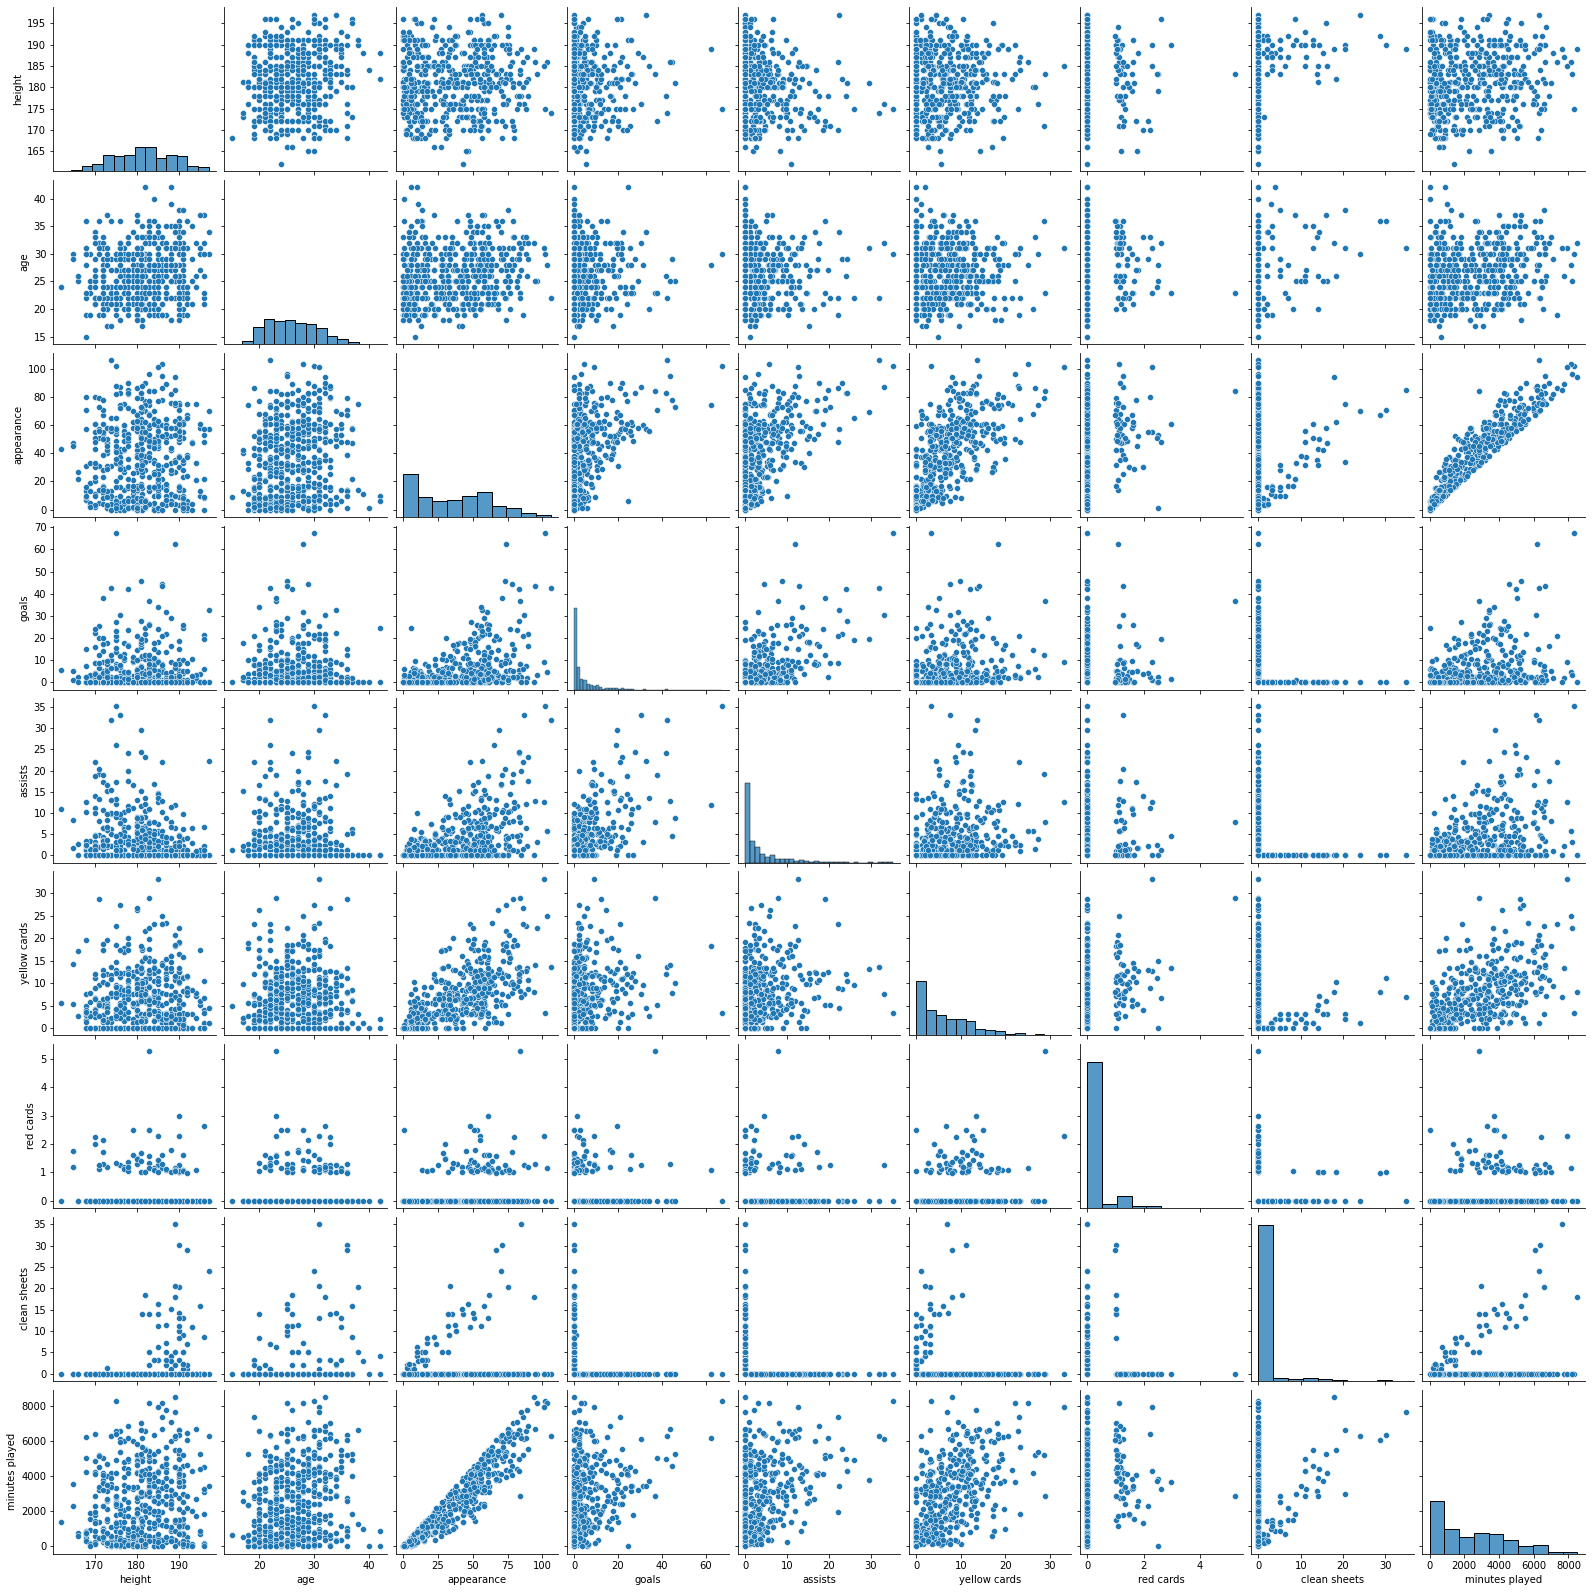

In [11]:
# Sample data for efficient pairplot
pairplot_columns = df[['height','age','appearance','goals','assists','yellow cards','red cards','clean sheets','minutes played']]

sample_size = 500  # Random 500 samples are picked to avoid complexity
sampled_data = pairplot_columns.sample(sample_size, random_state=42)

# Create pairplot
sns.pairplot(sampled_data)
plt.show()

Besides that we plot the correlation matrix to see the correlation between each columns. Correct parameter choices are important for the efficiency of our statistical and visualization findings. Warm colors represent strong correlations, while cool colors represent weak correlations.

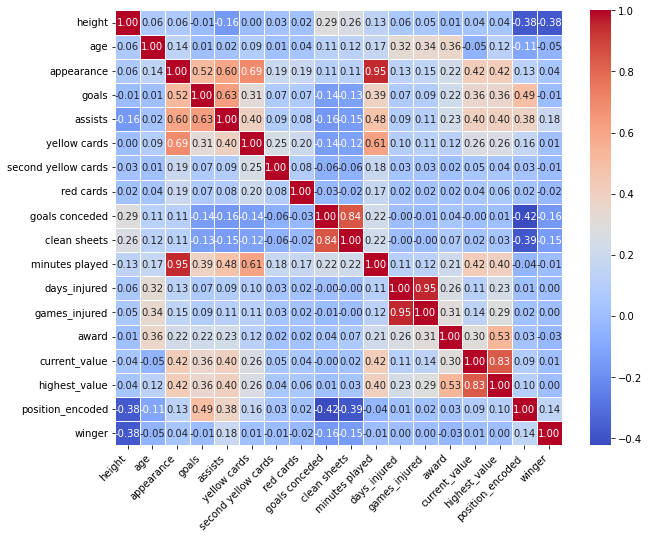

In [12]:
correlation_matrix = df.corr() # Correlation matrix creation

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Change the rotation for x-axis and y-axis
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

![Image Alt Text](p2.jpg)

### Can we differentiate goalkeeper performance with linear regression?

If a goalkeeper finishes the match without conceding any goals, then we consider this match as a clean sheet for the goalkeeper. Therefore, clean sheets are very crucial for the goalkeepers. In this task, we want to apply linear regression for goalkeepers and their performance statistics. By this task, we aim to find the goalkeepers with better performance during 2 seasons. We choose the players with position goalkeeper. We select the columns we are going to use.

In [13]:
# Filter players whose position are goalkeeper
goalkeepers = df[df['position'] == 'Goalkeeper']

# Selected columns for goalkeeper performance
goalkeeper_df = goalkeepers[['name','height', 'appearance', 'clean sheets', 'goals conceded']]

# Show the first 5 rows
goalkeeper_df.head()

name  height  appearance  clean sheets  goals conceded
0       David de Gea   189.0         104     34.888179      126.594249
1       Jack Butland   196.0          15      3.105828       18.634969
2         Tom Heaton   188.0           4      3.698630        2.465753
32   Alphonse Areola   195.0          41     18.419301       36.838602
33  Lukasz Fabianski   190.0          75     20.383512       99.879209

For a better result, we do not consider the goalkeepers who played less than 20 matches in 2 seasons. Therefore, we filter the goalkeepers.
Plotly express is used for interactive scatterplot. So, we can interactively take a look at goalkeepers' informations.

In [14]:
# Filter goalkeepers with appearances more than or equal to 20.
goalkeepers_filtered = goalkeeper_df[goalkeeper_df['appearance'] >= 20]

# Scatterplot for goalkeepers with linear regression
fig_goalkeepers = px.scatter(goalkeepers_filtered, x='goals conceded', y='appearance', color='clean sheets',
                             size='clean sheets', hover_name='name', template='plotly_white',
                             title='Appearances vs Goals Conceded for Goalkeepers',
                             labels={'goals conceded': 'Goals Conceded', 'clean sheets': 'Clean Sheets',
                                     'appearance': 'Number of Appearances'},
                             size_max=20, trendline='ols')  #for linear regression 'ols' is added
# Changing the layout
fig_goalkeepers.update_layout(xaxis_title='Appearances', yaxis_title='Goals conceded',
                              legend_title='Clean sheets', height=600)

# Show the interactive plot
fig_goalkeepers.show()

Based on the linear regression results, we can state that the goalkeepers who stayed above the line performed more successfully for 2 seasons than the goalkeepers that are below the line. It has been observed that while the performance increases towards the top, the performance decreases towards the bottom of the line.

![Image Alt Text](p3.jpg)

### Does goalkeeper height affect their clean sheet statistics?

There are stereotypes about the height of goalkeepers. It is thought that the taller the goalkeeper, the more successful he will be. In this task, we discuss the accuracy of this with our goalkeeper dataset.

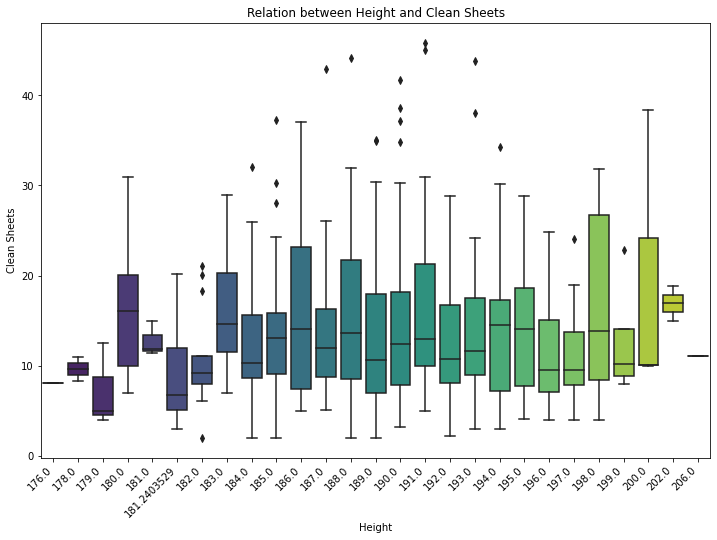

In [15]:
# Boxplot for height vs clean sheets
plt.figure(figsize=(12, 8))
sns.boxplot(x='height', y='clean sheets', data=goalkeepers_filtered, palette='viridis')

# Rename x and y-axis
plt.title('Relation between Height and Clean Sheets')
plt.xlabel('Height')
plt.ylabel('Clean Sheets')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

According to the boxplot, goalkeepers taller than 184 cm in general are more successful. But also being taller than average goalkeeper height is not giving an advantage to a goalkeeper and there is not a significant difference between different heights after a scale.

![Image Alt Text](p4.jpg)

### Which teams are the most aggressive teams in top 20 leagues?

In this task, we want to find the top 20 teams with different card statistics. Therefore, we find the most aggressive teams for 2 seasons. We want to filter the dataset with teams at least have 1 record for each of the features.

In [16]:
# Filter data
filtered_cards = df[(df['appearance'] >= 1) &
                   (df['yellow cards'] >= 1) &
                   (df['second yellow cards'] >= 1) &
                   (df['red cards'] >= 1)]

# Columns for cards
cards_columns = ['team','yellow cards', 'second yellow cards', 'red cards', 'appearance']

# Select related columns for visualization
cards_df = filtered_cards[cards_columns]

cards_df

team  yellow cards  second yellow cards  red cards  \
87                  Aston Villa     10.561609             1.056161   1.056161   
116     Wolverhampton Wanderers     12.584746             2.796610   1.398305   
193                  Everton FC      8.961677             1.120210   1.120210   
220           Nottingham Forest     14.150208             1.286383   2.572765   
282              Crystal Palace     16.018457             1.067897   1.067897   
...                         ...           ...                  ...        ...   
10385      Mamelodi Sundowns FC     12.445275             1.777896   1.777896   
10621    Central Coast Mariners      2.224576             2.224576   2.224576   
10682                 Sydney FC     11.424592             1.038599   1.038599   
10711           Adelaide United     12.851370             2.141895   1.070947   
10738  Western Sydney Wanderers      5.324759             1.331190   1.331190   

       appearance  
87             70  
116            77  
193            38  
220            55  
282            72  
...           ...  
10385          37  
10621          35  
10682          58  
10711          53  
10738          23  

[262 rows x 5 columns]

Then we group by team and select the top 20 teams with most yellow cards. Yellow card is chosen because it is most common in a football match.

In [17]:
# Calculate aggregated cards for each team
team_aggregated = cards_df.groupby('team').agg({
    'yellow cards': 'sum',
    'second yellow cards': 'sum',
    'red cards': 'sum'
}).reset_index()

# Select the top 20 teams based on the total number of yellow cards
top20_teams = team_aggregated.nlargest(20, 'yellow cards')

# Melt data for better plotting
top20_teams_melted = pd.melt(top20_teams, id_vars='team', var_name='Cards', value_name='Count')

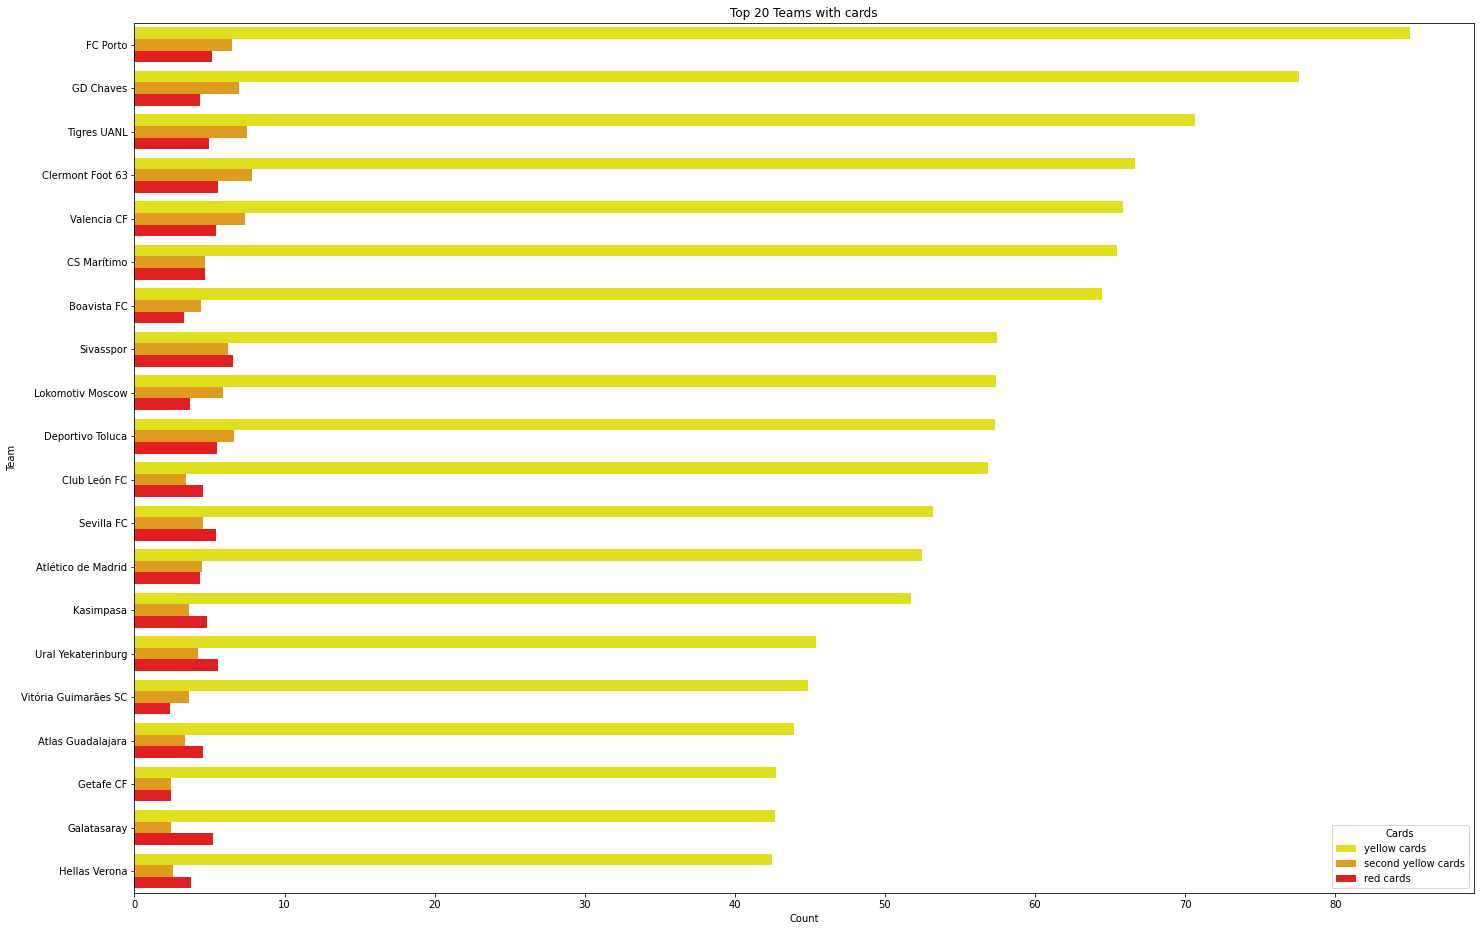

In [18]:
# Plot the cards aggregated for each team
colors = {'yellow cards': 'yellow', 'second yellow cards': 'orange', 'red cards': 'red'} #colors dictionary for color palette
plt.figure(figsize=(24, 16))
sns.barplot(x='Count', y='team', hue='Cards', data=top20_teams_melted, palette=colors)
plt.title('Top 20 Teams with cards')
plt.xlabel('Count')
plt.ylabel('Team')
plt.show()

### Can we classify players based on the percentage they play?

In this task, we want to classify the players according to rate of minutes they played. Important players always play for their teams and they are not being substituted out easily during a season.
- Players with at least 1 full match played are considered.
- The played rate is calculated using the formula: **played rate = ((minutes played) / (appearance * 90)) * 100**

In [19]:
# Filter data for players with appearances greater than or equal to 1 and minutes played greater than or equal to 90
df_with_playing_rate = df[(df['appearance'] >= 1) & (df['minutes played'] >= 90)]

# Calculate percentage of minutes played for each player
df_with_playing_rate['played_rate'] = (df_with_playing_rate['minutes played'] / (df_with_playing_rate['appearance'] * 90)) * 100

# Choose specific columns to use
df_played_rate = df_with_playing_rate[['name','appearance','goals','assists','minutes played','played_rate']]
df_played_rate

<ipython-input-19-84774cb8a957>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name  appearance     goals   assists  minutes played  \
0            David de Gea         104  0.000000  0.000000            9390   
1            Jack Butland          15  0.000000  0.000000            1304   
2              Tom Heaton           4  0.000000  0.000000             292   
3       Lisandro Martínez          82  2.303371  4.606742            6408   
4          Raphaël Varane          63  1.127013  1.127013            5031   
...                   ...         ...       ...       ...             ...   
10749       Aidan Simmons          16  2.815249  1.407625            1023   
10750        Kusini Yengi          26  9.689441  4.844721            1449   
10751     Nathanael Blair          20  7.500000  0.000000             960   
10752    Zachary Sapsford          17  5.306358  1.768786             865   
10753  Alexander Badolato          21  0.000000  0.000000            1046   

       played_rate  
0       100.320513  
1        96.592593  
2        81.111111  
3        86.829268  
4        88.730159  
...            ...  
10749    71.041667  
10750    61.923077  
10751    53.333333  
10752    56.535948  
10753    55.343915  

[9925 rows x 6 columns]

We are going to use K-means clustering for classifying the players according to their played rate. In this way, we see the importance of players to their teams in an interactive way. Random 1500 players are picked for the classification and visualization.

In [20]:
# Randomly select 1500 samples
random_sample = df_played_rate.sample(n=1500, random_state=42)

# Extract features for clustering
X = random_sample[['played_rate']]

# Applying K-means clustering with n=3
kmeans = KMeans(n_clusters=3, random_state=42)
random_sample['cluster'] = kmeans.fit_predict(X)

# Rename the clusters based on their team role.
cluster_names = {0: 'Bench players', 1: 'Reserve players', 2: 'Main team players'}
random_sample['cluster'] = random_sample['cluster'].map(cluster_names)

Create an interactive scatterplot for better k-means clustering visualization.

In [21]:
# Create an interactive scatter plot with player names
fig = px.scatter(random_sample, y='played_rate', color='cluster', hover_name='name',
                 labels={'played_rate': 'Played Rate (%)', 'name': 'Player Name'},
                 title='Classification of Players Based on K-means Clustering',
                 template='plotly', height=600, opacity=0.7)

# Customize the layout
fig.update_layout(yaxis=dict(title='Played Rate (%)', range=[10, 100]), showlegend=True)

# Show the interactive plot
fig.show()

![Image Alt Text](p5.jpg)

### Who are the players who contributed to the most goals with the least minutes played?

Goal contribution is not only scoring a goal. It also includes assists since assists are also goal passes. Therefore, we aim to find the players with lowest *minutes played* but with the highest *goal contribution*. Since we want to eliminate players with very few goal contribution and appearances, we choose players with at least 2 goals and 2 assists. At the same player must play at least 20 full matches, which is equal to 1800 minutes.
- Used formula is **goal contribution = minutes played/(goals+assists)**
- With this formula, we calculate per how many minutes the player contributes to the score. Less goal_contribution score is better.

In [22]:
# Calculate goals and assists contribution per minute
df_played_rate['goal_contribution'] = df_played_rate['minutes played'] / (df_played_rate['goals'] + df_played_rate['assists'])

# Filter players with at least 2 goals and 2 assists also played at least 20 full matches
filtered_contributors = df_played_rate[(df_played_rate['minutes played'] >= 1800) &
                                       (df_played_rate['goals'] >= 2) &
                                       (df_played_rate['assists'] >= 2)]

# Find players who contributed the least goals and assists per minute
score_contributors = filtered_contributors.nsmallest(20, 'goal_contribution')[['name', 'goal_contribution']]

# Display the bottom contributors
score_contributors

<ipython-input-22-38875710a1a6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



name  goal_contribution
1026  Eric Maxim Choupo-Moting          30.093061
6620            Jonas Arweiler          30.666964
5171         Aleksandr Erokhin          36.180000
6352          Mohammed Fuseini          38.730446
6292                Arda Güler          40.877444
3141                    Danilo          41.351450
4244             Toni Martínez          41.667963
3088       Francisco Conceição          41.712020
2699            Manfred Ugalde          41.816989
644                Sven Michel          42.294138
4815               Vadim Rakov          42.686943
3089             Brian Brobbey          43.973293
161                 Sékou Mara          44.625873
971          Youssoufa Moukoko          45.221186
8063             Nahuel Bustos          45.222480
1545                 Ansu Fati          46.060678
1053            Yussuf Poulsen          46.177789
7403      Georgios Giakoumakis          46.327798
4786        Yaroslav Gladyshev          46.467911
6588            Andreas Gruber          46.568999

Visualizing the top 20 players with barplot. These players are an important bench strength for their teams and they are very likely to be substitutes in the game at critical moments. Also we can say that some players are young and have high potential.

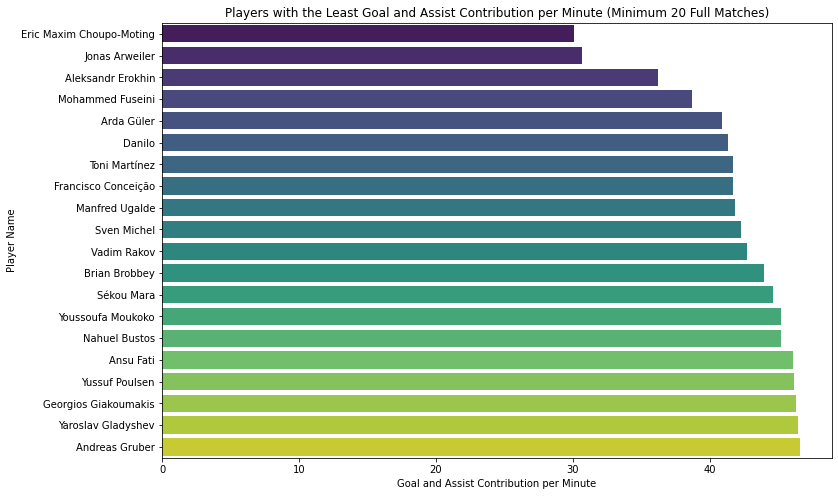

In [23]:
# Create a horizontal bar plot for players with the least goal and assist contribution per minute
plt.figure(figsize=(12, 8))
sns.barplot(x='goal_contribution', y='name', data=score_contributors, palette='viridis')

# Customize the plot
plt.title('Players with the Least Goal and Assist Contribution per Minute (Minimum 20 Full Matches)')
plt.xlabel('Goal and Assist Contribution per Minute')
plt.ylabel('Player Name')

# Show the plot
plt.show()

![Image Alt Text](p6.jpg)

### Do the prizes won have a relationship with the high market value?

Football is a team sport. Awards are won as a team. We want to determine if players with a lot of rewards have reached the highest market levels.

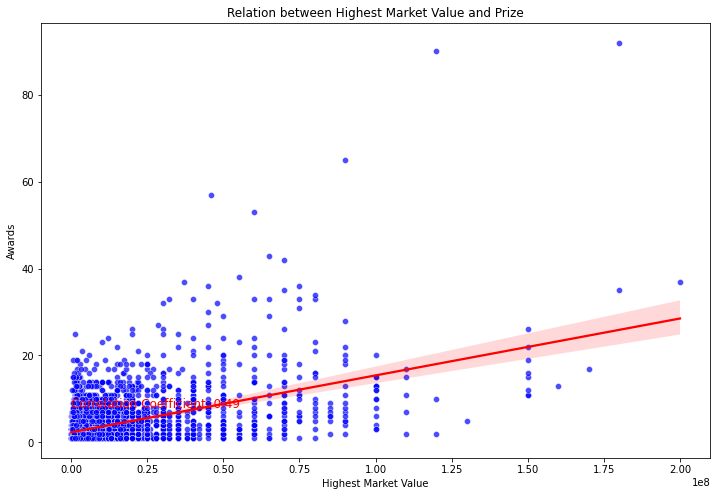

In [24]:
# Choose highest value and award columns.
award_data = df[(df['highest_value'] > 0) & (df['award'] > 0)]

# Using scatter plot and regression
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='highest_value', y='award', data=award_data, color='blue', alpha=0.7)

# Adding regression line
sns.regplot(x='highest_value', y='award', data=award_data, scatter=False, color='red')

# Customize the x and y-axis
plt.title('Relation between Highest Market Value and Prize')
plt.xlabel('Highest Market Value')
plt.ylabel('Awards')

# Calculate and display the correlation coefficient
correlation_coefficient, _ = pearsonr(award_data['highest_value'], award_data['award'])
plt.text(10, 8, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='red', fontsize=12)

# Show the plot
plt.show()

Even though there are some players with top transfer market values and with a lot of awards. Since football is a team game, there are also some players with low market value but still won considerable amount of awards. Top of the regression line scatters are successful in terms of awards won.

![Image Alt Text](p7.jpg)

### Does position of a player matter for game injuries?

There are several positions in football and each of them requires different skills and features. We would like to know whether game injuries affect players according to their positions or not. Violinplot with quasirandom jitter is used for visualization.

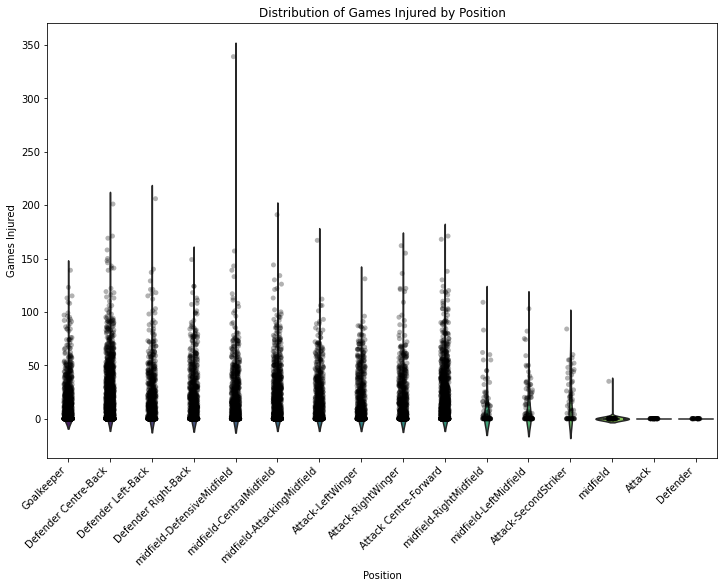

In [25]:
plt.figure(figsize=(12, 8))

# Violin plot
sns.violinplot(x='position', y='games_injured', data=df, palette='viridis', inner='quartile')

# Quasirandom jitter with stripplot
sns.stripplot(x='position', y='games_injured', data=df, color='black', jitter=True, alpha=0.3)

plt.title('Distribution of Games Injured by Position')
plt.xlabel('Position')
plt.ylabel('Games Injured')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis
plt.show()


We can easily see that players playing in the center of the field have a higher number of injuries than players playing on the wings. Again, the number of injuries increases as we move from the striker area to the goalkeeper area. 
We can show that the reason for this is that players playing in the center are exposed to much more physical contact. Again, we can say that goalkeepers are one of the positions that suffer the least injuries. We can ignore the 3 data on the right in the chart.

### Selecting features and model prediction

First of all we use labelencoder to convert categorical features into numerical values. The new encoded values will be stored in new columns as f_encoded where f represents name of the feature.

In [26]:
#LabelEncoder to convert data
le = LabelEncoder()
encoders = {}
text_features = ['team', 'position']
for f in text_features: 
    encoders[f] = le
    df[f+"_encoded"] = encoders[f].fit_transform(df[f])

2 nee columns are added to the dataframe.

In [27]:
df

player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name               position      height   age  \
0            David de Gea             Goalkeeper  189.000000  32.0   
1            Jack Butland             Goalkeeper  196.000000  30.0   
2              Tom Heaton             Goalkeeper  188.000000  37.0   
3       Lisandro Martínez   Defender Centre-Back  175.000000  25.0   
4          Raphaël Varane   Defender Centre-Back  191.000000  30.0   
...                   ...                    ...         ...   ...   
10749       Aidan Simmons     Attack-RightWinger  181.240353  20.0   
10750        Kusini Yengi  Attack Centre-Forward  190.000000  24.0   
10751     Nathanael Blair  Attack Centre-Forward  181.240353  19.0   
10752    Zachary Sapsford  Attack Centre-Forward  181.240353  20.0   
10753  Alexander Badolato  Attack Centre-Forward  170.000000  18.0   

       appearance     goals   assists  yellow cards  ...  clean sheets  \
0             104  0.000000  0.000000      0.996805  ...     34.888179   
1              15  0.000000  0.000000      1.035276  ...      3.105828   
2               4  0.000000  0.000000      0.000000  ...      3.698630   
3              82  2.303371  4.606742     18.426966  ...      0.000000   
4              63  1.127013  1.127013      3.381038  ...      0.000000   
...           ...       ...       ...           ...  ...           ...   
10749          16  2.815249  1.407625      4.222874  ...      0.000000   
10750          26  9.689441  4.844721      4.844721  ...      0.000000   
10751          20  7.500000  0.000000      3.750000  ...      0.000000   
10752          17  5.306358  1.768786      0.000000  ...      0.000000   
10753          21  0.000000  0.000000      1.806883  ...      0.000000   

       minutes played  days_injured  games_injured  award  current_value  \
0                9390            42              5     13       15000000   
1                1304           510             58      1        1500000   
2                 292           697             84      4         600000   
3                6408           175             22      9       50000000   
4                5031           238             51     21       40000000   
...               ...           ...            ...    ...            ...   
10749            1023             0              0      0          75000   
10750            1449           102             18      0         300000   
10751             960             0              0      0          50000   
10752             865             0              0      0          50000   
10753            1046             0              0      0          25000   

       highest_value  position_encoded  winger  team_encoded  
0           70000000                 9       0           226  
1           22000000                 9       0           226  
2            6000000                 9       0           226  
3           50000000                 6       0           226  
4           80000000                 6       0           226  
...              ...               ...     ...           ...  
10749          75000 

Features are selected by considering the results of previous tasks in this project and the parameters that have the most impact on football matches. The parameters that have the most direct impact on team or individual success are considered.

In [28]:
# Features
features = ['appearance','goals','assists','highest_value', 'minutes played', 'award','position_encoded', 'team_encoded']

In [29]:
# Our target is to predict current value for players
X = df[features]
y = df['current_value']

In [30]:
# Splitting data into train and test parts 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

StandardScaler is used for standardization of the features. Therefore, the features become more comparable.

In [31]:
# Standardization of the features
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Gradient Boosting Regressor is used because accuracy is higher compared to other learning algorithms. Structure of the dataset is compatible for Gradient Boosting Regressor.

In [32]:
# Using Gradient Boosting Regressor model and fitting data
regressor = ensemble.GradientBoostingRegressor(n_estimators=1000,
                                               max_depth=4,
                                               min_samples_split=3,
                                               learning_rate=0.02,
                                               loss='squared_error')

# Fit the model
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
#Print accuracy
r2 = r2_score(y_test, y_pred)
print(f'Accuracy: {r2:.2f}')

Accuracy: 0.81


In this project, we analyzed the relation of complex football statistics between each other statistically and visually. The purpose of the project is the transfer market value prediction model developed for football players. According to the tasks done with the dataset, there is a prediction model that works with 81% efficiency. Obviously, there are much more complex statistics in football that are not included in this dataset, and we cannot deny that these statistics affect the market value of the players as well. In a dataset where more complex data is used, prediction models can be created with much higher accuracy.
Apart from this, various data science methods, different visualizations and statistics were used to find answers to various research questions, and various findings were found based on player-based, team-based and some specific statistics. 